Here we try to understand how to implement word embedding using embedding layer in Keras. 

First parameter to consider is the dictionary size |V|. 

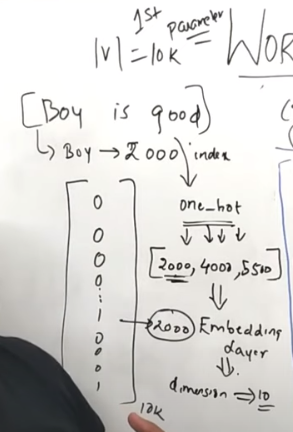

Lets consider the sentence **Boy is good**. These 3 words are in our dictionary at index 2000,4000 and 5500. Using **one_hot in Keras** we convert these into vectors of size equal to the dictionary size.

Next we use the Embedding layer and convert this to **Word Representation** and the parameter to provide here **no of features**. If we provide 300 then our maxtrix length wil be converted to 300 making it a dense matrix.  

## Exercise : Word Embedding Techniques using Embedding Layer in Keras

In [1]:
### Libraries USed Tensorflow> 2.0  and keras

#### diff between tenorflow >2.0 and less than 2.0

in tensorflow 2.0 and above keras is intergrated with it hence no need to have seperate keras.

if I had tenserflow <2.0 then the below import statemnt would be like
from keras.preprocessing.text import one_hot

In [2]:
import tensorflow as tf
print(tf.__version__)

2.3.0


**Steps to flow to complete this exercise is as below :**

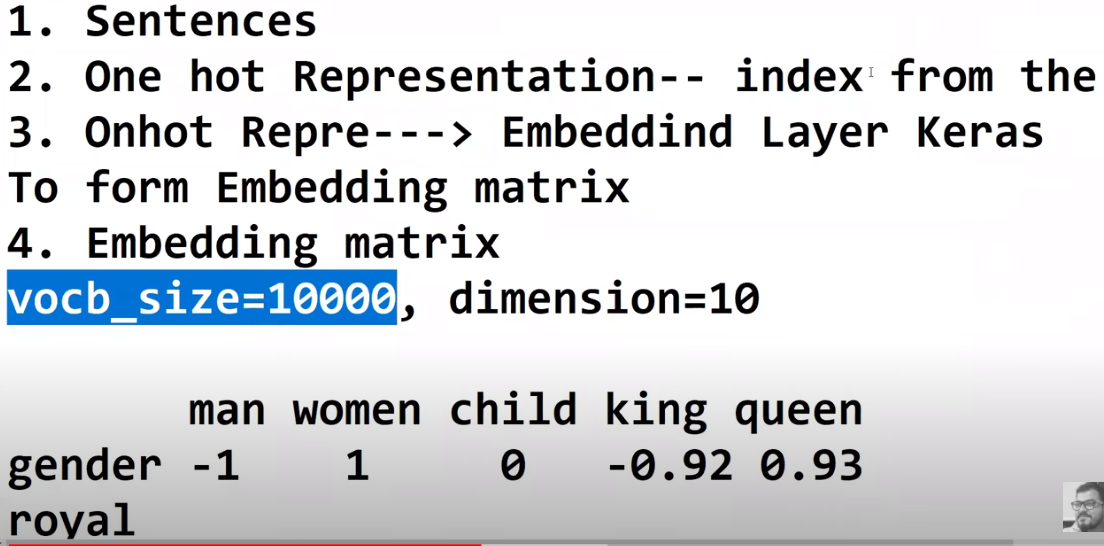

In [3]:
##tensorflow >2.0
from tensorflow.keras.preprocessing.text import one_hot

In [4]:
### sentences
sent=[  'the glass of milk',
     'the glass of juice',
     'the cup of tea',
    'I am a good boy',
     'I am a good developer',
     'understand the meaning of words',
     'your videos are good',]

In [5]:
### As mentioned in therory as per picture above 1 step is one hot representaion
### 2st parameter is Vocabulary size
voc_size=10000

#### One Hot Representation

In [6]:
onehot_repr=[one_hot(words,voc_size)for words in sent] 
for i in onehot_repr:
    print(i)

[5358, 8894, 8032, 7586]
[5358, 8894, 8032, 6348]
[5358, 8587, 8032, 8958]
[1384, 6586, 6418, 6762, 5525]
[1384, 6586, 6418, 6762, 4254]
[8238, 5358, 6926, 8032, 1937]
[2698, 7569, 9001, 6762]


### Word Embedding Represntation

In [7]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences # padding values as size should be same
from tensorflow.keras.models import Sequential
import numpy as np

In [8]:
sent_length=8 # make all sentences as length 8
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length) # pre means pad zeroes in front- try 'post'
print(embedded_docs)

[[   0    0    0    0 1179 9974 8571 9846]
 [   0    0    0    0 1179 9974 8571 7347]
 [   0    0    0    0 1179 4252 8571 3985]
 [   0    0    0 1773 6196 6482 3893  498]
 [   0    0    0 1773 6196 6482 3893 2893]
 [   0    0    0 9366 1179 9853 8571  509]
 [   0    0    0    0 8696 8882 3425 3893]]


In [9]:
# set dimension i.e features for feature representation

dim=10

In [10]:
model=Sequential()
model.add(Embedding(voc_size,dim,input_length=sent_length)) # dict size, feature size and sentence size
model.compile('adam','mse') # mse is mean square error

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 8, 10)             100000    
Total params: 100,000
Trainable params: 100,000
Non-trainable params: 0
_________________________________________________________________


In [12]:
print(model.predict(embedded_docs))

[[[-0.02010831  0.00825574 -0.01701087 -0.00617843 -0.03321276
   -0.0085816   0.00909955 -0.03082759 -0.01502969  0.0282707 ]
  [-0.02010831  0.00825574 -0.01701087 -0.00617843 -0.03321276
   -0.0085816   0.00909955 -0.03082759 -0.01502969  0.0282707 ]
  [-0.02010831  0.00825574 -0.01701087 -0.00617843 -0.03321276
   -0.0085816   0.00909955 -0.03082759 -0.01502969  0.0282707 ]
  [-0.02010831  0.00825574 -0.01701087 -0.00617843 -0.03321276
   -0.0085816   0.00909955 -0.03082759 -0.01502969  0.0282707 ]
  [-0.0106859  -0.02329903 -0.00424795 -0.03339632 -0.04266855
    0.04773967 -0.04554781 -0.04503288 -0.03443587 -0.0016582 ]
  [-0.01335113  0.01806474  0.03186465  0.02099783  0.01744555
    0.0046391   0.00443398 -0.00353526 -0.00949245 -0.00775646]
  [-0.04004927 -0.01617707 -0.04558527 -0.01604282 -0.04516831
   -0.00165628  0.0367522   0.04902777 -0.03918229  0.00534624]
  [-0.03757653  0.02488292 -0.02586101  0.03398955  0.00085039
   -0.03272184 -0.00783388 -0.01440147 -0.043683

In [13]:
embedded_docs[0] # setence of legth 8

array([   0,    0,    0,    0, 1179, 9974, 8571, 9846])

In [14]:
print(model.predict(embedded_docs[0])) # every element in the above list is convert to 10 elements so hence we have 8 elements
# our output layer will be 8 * 10

[[[-0.02010831  0.00825574 -0.01701087 -0.00617843 -0.03321276
   -0.0085816   0.00909955 -0.03082759 -0.01502969  0.0282707 ]]

 [[-0.02010831  0.00825574 -0.01701087 -0.00617843 -0.03321276
   -0.0085816   0.00909955 -0.03082759 -0.01502969  0.0282707 ]]

 [[-0.02010831  0.00825574 -0.01701087 -0.00617843 -0.03321276
   -0.0085816   0.00909955 -0.03082759 -0.01502969  0.0282707 ]]

 [[-0.02010831  0.00825574 -0.01701087 -0.00617843 -0.03321276
   -0.0085816   0.00909955 -0.03082759 -0.01502969  0.0282707 ]]

 [[-0.0106859  -0.02329903 -0.00424795 -0.03339632 -0.04266855
    0.04773967 -0.04554781 -0.04503288 -0.03443587 -0.0016582 ]]

 [[-0.01335113  0.01806474  0.03186465  0.02099783  0.01744555
    0.0046391   0.00443398 -0.00353526 -0.00949245 -0.00775646]]

 [[-0.04004927 -0.01617707 -0.04558527 -0.01604282 -0.04516831
   -0.00165628  0.0367522   0.04902777 -0.03918229  0.00534624]]

 [[-0.03757653  0.02488292 -0.02586101  0.03398955  0.00085039
   -0.03272184 -0.00783388 -0.0144

**Reference Link to learn more:** [link](https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/)